#Data Loading

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

In [3]:
!unzip /content/drive/MyDrive/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: socofing/SOCOFing/Real/191__F_Left_index_finger.BMP  
  inflating: socofing/SOCOFing/Real/191__F_Left_little_finger.BMP  
  inflating: socofing/SOCOFing/Real/191__F_Left_middle_finger.BMP  
  inflating: socofing/SOCOFing/Real/191__F_Left_ring_finger.BMP  
  inflating: socofing/SOCOFing/Real/191__F_Left_thumb_finger.BMP  
  inflating: socofing/SOCOFing/Real/191__F_Right_index_finger.BMP  
  inflating: socofing/SOCOFing/Real/191__F_Right_little_finger.BMP  
  inflating: socofing/SOCOFing/Real/191__F_Right_middle_finger.BMP  
  inflating: socofing/SOCOFing/Real/191__F_Right_ring_finger.BMP  
  inflating: socofing/SOCOFing/Real/191__F_Right_thumb_finger.BMP  
  inflating: socofing/SOCOFing/Real/192__M_Left_index_finger.BMP  
  inflating: socofing/SOCOFing/Real/192__M_Left_little_finger.BMP  
  inflating: socofing/SOCOFing/Real/192__M_Left_middle_finger.BMP  
  inflating: socofing/SOCOFing/Real/192__M_Left_ring_finger.BMP  
  i

#Data Preprocessing

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

import glob, os

In [4]:
def extract_label(img_path):
    filename, _ = os.path.splitext(os.path.basename(img_path))

    subject_id, etc = filename.split('__')
    gender, lr, finger, _ = etc.split('_')

    gender = 0 if gender == 'M' else 1
    lr = 0 if lr =='Left' else 1

    if finger == 'thumb':
        finger = 0
    elif finger == 'index':
        finger = 1
    elif finger == 'middle':
        finger = 2
    elif finger == 'ring':
        finger = 3
    elif finger == 'little':
        finger = 4

    return np.array([subject_id, gender, lr, finger], dtype=np.uint16)

def extract_label2(img_path):
    filename, _ = os.path.splitext(os.path.basename(img_path))

    subject_id, etc = filename.split('__')
    gender, lr, finger, _, _ = etc.split('_')

    gender = 0 if gender == 'M' else 1
    lr = 0 if lr =='Left' else 1

    if finger == 'thumb':
        finger = 0
    elif finger == 'index':
        finger = 1
    elif finger == 'middle':
        finger = 2
    elif finger == 'ring':
        finger = 3
    elif finger == 'little':
        finger = 4

    return np.array([subject_id, gender, lr, finger], dtype=np.uint16)

6000


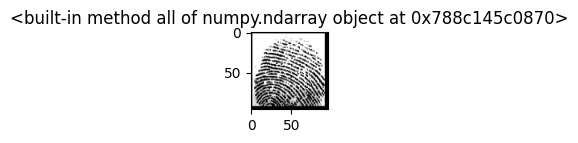

In [6]:
img_list = sorted(glob.glob('/content/SOCOFing/Real/*.BMP'))
print(len(img_list))

imgs = np.empty((len(img_list), 96, 96), dtype=np.uint8)
labels = np.empty((len(img_list), 4), dtype=np.uint16)

for i, img_path in enumerate(img_list):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (96, 96))
    imgs[i] = img

    labels[i] = extract_label(img_path)

np.save('/content/x_real.npz', imgs)
np.save('/content/y_real.npy', labels)

plt.figure(figsize=(1, 1))
plt.title(labels[-1].all)
plt.imshow(imgs[-1], cmap='gray')

17931


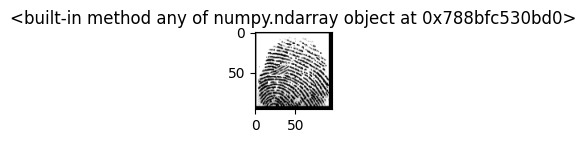

In [7]:
img_list = sorted(glob.glob('/content/SOCOFing/Altered/Altered-Easy/*.BMP'))
print(len(img_list))

imgs = np.empty((len(img_list), 96, 96), dtype=np.uint8)
labels = np.empty((len(img_list), 4), dtype=np.uint16)

for i, img_path in enumerate(img_list):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (96, 96))
    imgs[i] = img

    labels[i] = extract_label2(img_path)

np.save('/content/x_easy.npz', imgs)
np.save('/content/y_easy.npy', labels)

plt.figure(figsize=(1, 1))
plt.title(labels[-1].any)
plt.imshow(imgs[-1], cmap='gray')

17067


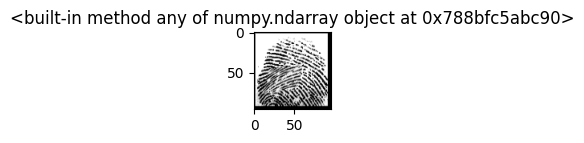

In [8]:
img_list = sorted(glob.glob('/content/SOCOFing/Altered/Altered-Medium/*.BMP'))
print(len(img_list))

imgs = np.empty((len(img_list), 96, 96), dtype=np.uint8)
labels = np.empty((len(img_list), 4), dtype=np.uint16)

for i, img_path in enumerate(img_list):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (96, 96))
    imgs[i] = img

    labels[i] = extract_label2(img_path)

np.save('/content/x_medium.npz', imgs)
np.save('/content/y_medium.npy', labels)

plt.figure(figsize=(1, 1))
plt.title(labels[-1].any)
plt.imshow(imgs[-1], cmap='gray')

14272


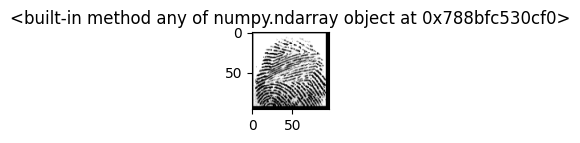

In [9]:
img_list = sorted(glob.glob('/content/SOCOFing/Altered/Altered-Hard/*.BMP'))
print(len(img_list))

imgs = np.empty((len(img_list), 96, 96), dtype=np.uint8)
labels = np.empty((len(img_list), 4), dtype=np.uint16)

for i, img_path in enumerate(img_list):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (96, 96))
    imgs[i] = img


    labels[i] = extract_label2(img_path)

np.save('/content/x_hard.npz', imgs)
np.save('/content/y_hard.npy', labels)

plt.figure(figsize=(1, 1))
plt.title(labels[-1].any)
plt.imshow(imgs[-1], cmap='gray')

#Training

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers
from keras.models import Model
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from imgaug import augmenters as iaa

import random

(6000, 90, 90, 1) (6000, 4)


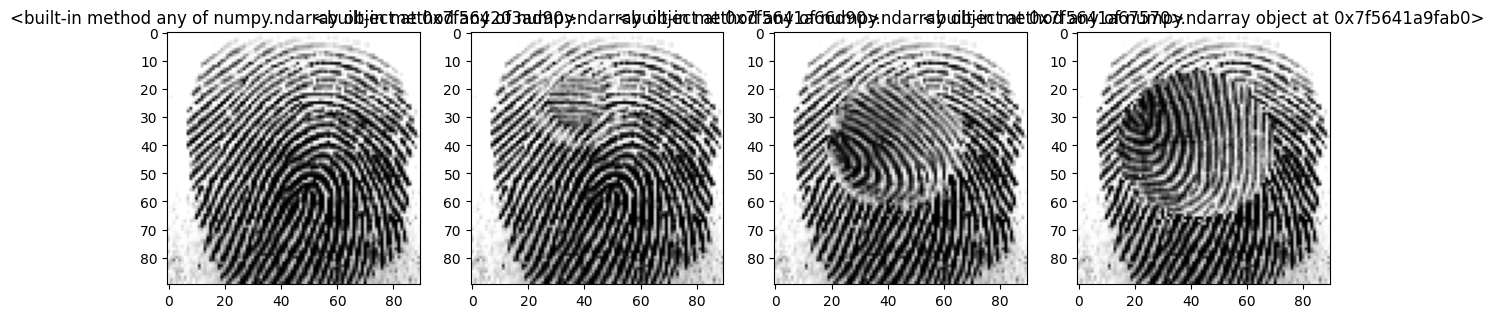

In [6]:
x_real = np.load('/content/drive/MyDrive/Dataset/x_real.npz')['data']
y_real = np.load('/content/y_real.npy')
x_easy = np.load('/content/drive/MyDrive/Dataset/x_easy.npz')['data']
y_easy = np.load('/content/y_easy.npy')
x_medium = np.load('/content/drive/MyDrive/Dataset/x_medium.npz')['data']
y_medium = np.load('/content/y_medium.npy')
x_hard = np.load('/content/drive/MyDrive/Dataset/x_hard.npz')['data']
y_hard = np.load('/content/y_hard.npy')

print(x_real.shape, y_real.shape)

plt.figure(figsize=(15, 10))
plt.subplot(1, 4, 1)
plt.title(y_real[0].any)
plt.imshow(x_real[0].squeeze(), cmap='gray')
plt.subplot(1, 4, 2)
plt.title(y_easy[0].any)
plt.imshow(x_easy[0].squeeze(), cmap='gray')
plt.subplot(1, 4, 3)
plt.title(y_medium[0].any)
plt.imshow(x_medium[0].squeeze(), cmap='gray')
plt.subplot(1, 4, 4)
plt.title(y_hard[0].any)
plt.imshow(x_hard[0].squeeze(), cmap='gray')

In [7]:
x_data = np.concatenate([x_easy, x_medium, x_hard], axis=0)
label_data = np.concatenate([y_easy, y_medium, y_hard], axis=0)

x_train, x_val, label_train, label_val = train_test_split(x_data, label_data, test_size=0.1)

print(x_data.shape, label_data.shape)
print(x_train.shape, label_train.shape)
print(x_val.shape, label_val.shape)

(49270, 90, 90, 1) (49270, 4)
(44343, 90, 90, 1) (44343, 4)
(4927, 90, 90, 1) (4927, 4)


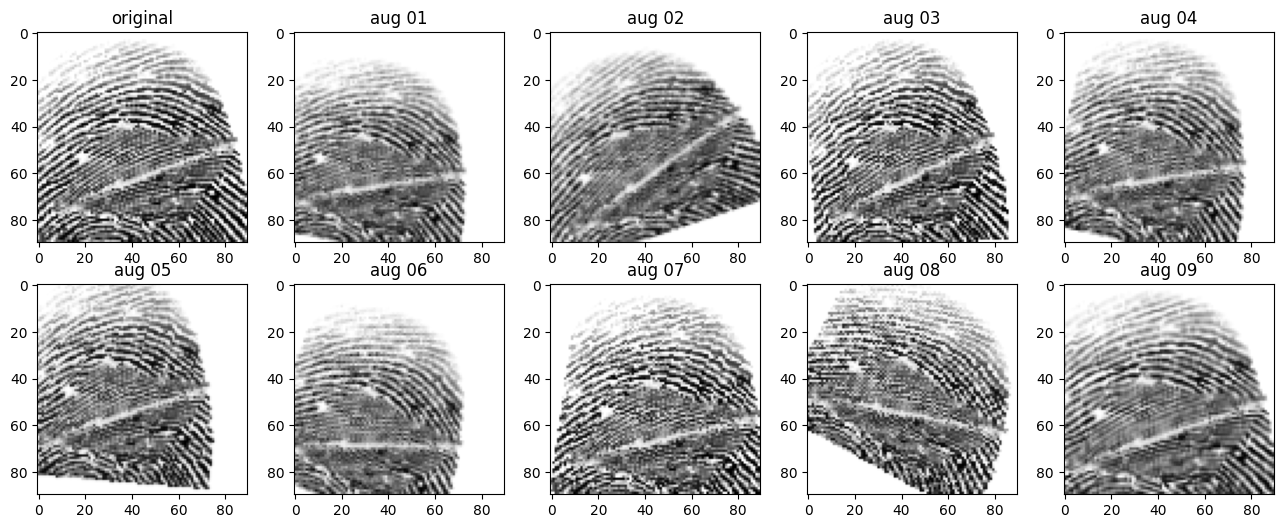

In [8]:
augs = [x_data[40000]] * 9

seq = iaa.Sequential([

    iaa.GaussianBlur(sigma=(0, 0.5)),
    iaa.Affine(

        scale={"x": (0.9, 1.1), "y": (0.9, 1.1)},

        translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)},

        rotate=(-30, 30),

        order=[0, 1],

        cval=255
    )
], random_order=True)

augs = seq.augment_images(augs)

plt.figure(figsize=(16, 6))
plt.subplot(2, 5, 1)
plt.title('original')
plt.imshow(x_data[40000].squeeze(), cmap='gray')
for i, aug in enumerate(augs):
    plt.subplot(2, 5, i+2)
    plt.title('aug %02d' % int(i+1))
    plt.imshow(aug.squeeze(), cmap='gray')

In [9]:
label_real_dict = {}

for i, y in enumerate(y_real):
    key = y.astype(str)
    key = ''.join(key).zfill(6)

    label_real_dict[key] = i

In [10]:
class DataGenerator(keras.utils.Sequence):
    def __init__(self, x, label, x_real, label_real_dict, batch_size=32, shuffle=True):
        'Initialization'
        self.x = x
        self.label = label
        self.x_real = x_real
        self.label_real_dict = label_real_dict

        self.batch_size = batch_size
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.x) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'

        x1_batch = self.x[index*self.batch_size:(index+1)*self.batch_size]
        label_batch = self.label[index*self.batch_size:(index+1)*self.batch_size]

        x2_batch = np.empty((self.batch_size, 90, 90, 1), dtype=np.float32)
        y_batch = np.zeros((self.batch_size, 1), dtype=np.float32)

        if self.shuffle:
            seq = iaa.Sequential([
                iaa.GaussianBlur(sigma=(0, 0.5)),
                iaa.Affine(
                    scale={"x": (0.9, 1.1), "y": (0.9, 1.1)},
                    translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)},
                    rotate=(-30, 30),
                    order=[0, 1],
                    cval=255
                )
            ], random_order=True)

            x1_batch = seq.augment_images(x1_batch)


        for i, l in enumerate(label_batch):
            match_key = l.astype(str)
            match_key = ''.join(match_key).zfill(6)

            if random.random() > 0.5:

                x2_batch[i] = self.x_real[self.label_real_dict[match_key]]
                y_batch[i] = 1.
            else:

                while True:
                    unmatch_key, unmatch_idx = random.choice(list(self.label_real_dict.items()))

                    if unmatch_key != match_key:
                        break

                x2_batch[i] = self.x_real[unmatch_idx]
                y_batch[i] = 0.

        return [x1_batch.astype(np.float32) / 255., x2_batch.astype(np.float32) / 255.], y_batch

    def on_epoch_end(self):
        if self.shuffle == True:
            self.x, self.label = shuffle(self.x, self.label)

In [11]:
train_gen = DataGenerator(x_train, label_train, x_real, label_real_dict, shuffle=True)
val_gen = DataGenerator(x_val, label_val, x_real, label_real_dict, shuffle=False)

In [ ]:
x1 = layers.Input(shape=(90, 90, 1))
x2 = layers.Input(shape=(90, 90, 1))

inputs = layers.Input(shape=(90, 90, 1))

feature = layers.Conv2D(32, kernel_size=3, padding='same', activation='relu')(inputs)
feature = layers.MaxPooling2D(pool_size=2)(feature)

feature = layers.Conv2D(32, kernel_size=3, padding='same', activation='relu')(feature)
feature = layers.MaxPooling2D(pool_size=2)(feature)

feature_model = Model(inputs=inputs, outputs=feature)


x1_net = feature_model(x1)
x2_net = feature_model(x2)


net = layers.Subtract()([x1_net, x2_net])

net = layers.Conv2D(32, kernel_size=3, padding='same', activation='relu')(net)
net = layers.MaxPooling2D(pool_size=2)(net)

net = layers.Flatten()(net)

net = layers.Dense(64, activation='relu')(net)

net = layers.Dense(1, activation='sigmoid')(net)

model = Model(inputs=[x1, x2], outputs=net)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 90, 90, 1)]          0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 90, 90, 1)]          0         []                            
                                                                                                  
 model (Functional)          (None, 22, 22, 32)           9568      ['input_1[0][0]',             
                                                                     'input_2[0][0]']             
                                                                                                  
 subtract (Subtract)         (None, 22, 22, 32)           0         ['model[0][0]',         

In [ ]:
history = model.fit_generator(train_gen, epochs=15, validation_data=val_gen)

Epoch 1/15


<ipython-input-16-8a04cad3d095>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_gen, epochs=15, validation_data=val_gen)


1385/1385 [==============================] - 821s 591ms/step - loss: 0.2432 - acc: 0.8954 - val_loss: 0.0558 - val_acc: 0.9792
Epoch 2/15
1385/1385 [==============================] - 798s 577ms/step - loss: 0.1418 - acc: 0.9448 - val_loss: 0.0501 - val_acc: 0.9781
Epoch 3/15
1385/1385 [==============================] - 835s 603ms/step - loss: 0.1119 - acc: 0.9568 - val_loss: 0.0291 - val_acc: 0.9879
Epoch 4/15
1385/1385 [==============================] - 776s 560ms/step - loss: 0.0935 - acc: 0.9654 - val_loss: 0.0321 - val_acc: 0.9863
Epoch 5/15
1385/1385 [==============================] - 720s 520ms/step - loss: 0.0848 - acc: 0.9680 - val_loss: 0.0157 - val_acc: 0.9937
Epoch 6/15
1385/1385 [==============================] - 686s 496ms/step - loss: 0.0753 - acc: 0.9724 - val_loss: 0.0141 - val_acc: 0.9939
Epoch 7/15
1385/1385 [==============================] - 708s 511ms/step - loss: 0.0681 - acc: 0.9750 - val_loss: 0.0306 - val_acc: 0.9879
Epoch 8/15
1385/1385 [=======================

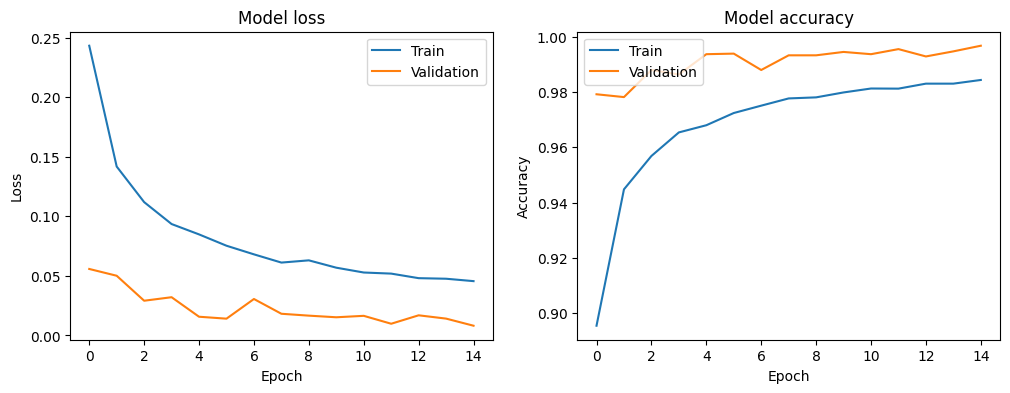

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')


plt.subplot(1, 2, 2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [12]:
import pickle
model = pickle.load(open('/content/model_saved', 'rb'))

In [13]:
i=2
random_img = x_val[i]
random_label = label_val[i]

seq = iaa.Sequential([
    iaa.GaussianBlur(sigma=(0, 0.5)),
    iaa.Affine(
        scale={"x": (0.9, 1.1), "y": (0.9, 1.1)},
        translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)},
        rotate=(-30, 30),
        order=[0, 1],
        cval=255
    )
], random_order=True)

random_img = seq.augment_image(random_img).reshape((1, 90, 90, 1)).astype(np.float32) / 255.


match_key = random_label.astype(str)
match_key = ''.join(match_key).zfill(6)

rx = x_real[label_real_dict[match_key]].reshape((1, 90, 90, 1)).astype(np.float32) / 255.
ry = y_real[label_real_dict[match_key]]

print(match_key)
print(len(label_real_dict))
count = 0
for match_key in label_real_dict:
  print(match_key)
  count = count+1
print(count)

Streaming output truncated to the last 5000 lines.
191104
191102
191103
191100
191111
191114
191112
191113
191110
192001
192004
192002
192003
192000
192011
192014
192012
192013
192010
193001
193004
193002
193003
193000
193011
193014
193012
193013
193010
194001
194004
194002
194003
194000
194011
194014
194012
194013
194010
195001
195004
195002
195003
195000
195011
195014
195012
195013
195010
196001
196004
196002
196003
196000
196011
196014
196012
196013
196010
197001
197004
197002
197003
197000
197011
197014
197012
197013
197010
198001
198004
198002
198003
198000
198011
198014
198012
198013
198010
199001
199004
199002
199003
199000
199011
199014
199012
199013
199010
019001
019004
019002
019003
019000
019011
019014
019012
019013
019010
001001
001004
001002
001003
001000
001011
001014
001012
001013
001010
200001
200004
200002
200003
200000
200011
200014
200012
200013
200010
201101
201104
201102
201103
201100
201111
201114
201112
201113
201110
202001
202004
202002
202003
202000
202011
2020

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 46ms/step


<ipython-input-16-90cb2039a9af>:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title('O: %.02f, %s' % (max_score, best_label))


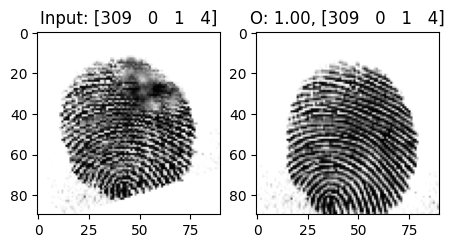

In [16]:
i=2
random_img = x_val[i]
random_label = label_val[i]

seq = iaa.Sequential([
    iaa.GaussianBlur(sigma=(0, 0.5)),
    iaa.Affine(
        scale={"x": (0.9, 1.1), "y": (0.9, 1.1)},
        translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)},
        rotate=(-30, 30),
        order=[0, 1],
        cval=255
    )
], random_order=True)

random_img = seq.augment_image(random_img).reshape((1, 90, 90, 1)).astype(np.float32) / 255.


match_key = random_label.astype(str)
match_key = ''.join(match_key).zfill(6)

max_score = 0

for match_key in label_real_dict:
  rx = x_real[label_real_dict[match_key]].reshape((1, 90, 90, 1)).astype(np.float32) / 255.
  ry = y_real[label_real_dict[match_key]]

  pred_rx = model.predict([random_img, rx])

  if pred_rx > max_score:
    max_score = pred_rx
    best_match = rx
    best_label=ry



  # unmatched image
  # unmatch_key, unmatch_idx = random.choice(list(label_real_dict.items()))

  # ux = x_real[unmatch_idx].reshape((1, 90, 90, 1)).astype(np.float32) / 255.
  # uy = y_real[unmatch_idx]

  # pred_ux = model.predict([random_img, ux]) #Assuming y_val contains true labels
  #Use predictions for matched and unmatched images

  #Combine predictions into a single array
  #y_pred = np.concatenate((pred_rx, pred_ux), axis=0)

plt.figure(figsize=(8, 4))
plt.subplot(1, 3, 1)
plt.title('Input: %s' %random_label)
plt.imshow(random_img.squeeze(), cmap='gray')
plt.subplot(1, 3, 2)
plt.title('O: %.02f, %s' % (max_score, best_label))
plt.imshow(best_match.squeeze(), cmap='gray')
  #plt.subplot(1, 3, 3)
  # plt.title('X: %.02f, %s' % (pred_ux, uy))
  # plt.imshow(ux.squeeze(), cmap='gray')

